In [1]:
from sparkle.transforms.api import transform_df, Input, Output
import sparkle

In [2]:
rt = sparkle.SparkleRuntime()
rt.start()

Exception: Java gateway process exited before sending its port number

In [3]:
bar = Input("testdata/oscar_age_female.csv")
rt.load(bar).toPandas()

,Index,Year,Age,Name,Movie
0,1,1928,22,Janet Gaynor,"Seventh Heaven,Street Angel and Sunrise: A Son..."
1,2,1929,37,Mary Pickford,Coquette
2,3,1930,28,Norma Shearer,The Divorcee
3,4,1931,63,Marie Dressler,Min and Bill
4,5,1932,32,Helen Hayes,The Sin of Madelon Claudet
...,...,...,...,...,...
84,85,2012,62,Meryl Streep,The Iron Lady
85,86,2013,22,Jennifer Lawrence,Silver Linings Playbook
86,87,2014,44,Cate Blanchett,Blue Jasmine
87,88,2015,54,Julianne Moore,Still Alice


In [4]:
#df = rt.load(bar)

In [5]:
from pyspark.sql import DataFrame
import pyspark.sql.functions as F

In [6]:
@transform_df(
    Output("testdata/result2"),
    xx=Input("testdata/oscar_age_female.csv"),
    xy=Input("testdata/oscar_age_male.csv")
)
def mytransform(ctx, xx : DataFrame, xy : DataFrame):
    return (xx.withColumn('Gender', F.lit('female'))
            .union(xy.withColumn('Gender', F.lit('male')))
            .orderBy(xx.Age))

rt.transforms.clear()
rt.add_transform(mytransform)

In [7]:
rt.submit()

Reading testdata/oscar_age_female.csv
Reading testdata/oscar_age_male.csv
Saving testdata/result2


In [8]:
df=rt.load(Input("testdata/result2")).toPandas()

In [9]:
import matplotlib.pyplot as plt

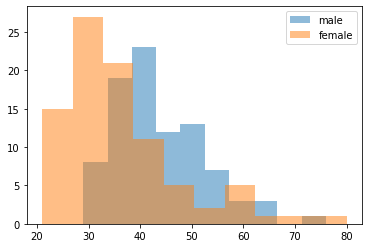

In [10]:
plt.hist(df[df.Gender=='male'].Age.astype(int), alpha=0.5, label='male', bins=10)
plt.hist(df[df.Gender=='female'].Age.astype(int), alpha=0.5, label='female', bins=10)
plt.legend()